In [1]:
import requests
import json
import os
from datetime import datetime
import matplotlib.pyplot as plt
import pandas as pd
from models.deputado import Deputado
from models.deputado_uri import DeputadoUri

In [2]:



dir = 'data/deputados/'
files = [f for f in os.listdir(dir) if os.path.isfile(os.path.join(dir, f))]
if len(files) == 0:
    with open('data/deputados.json', 'r', encoding='utf-8') as file:
        data = json.load(file)
        for deputado in data['dados']:
            response = requests.get(deputado['uri'])
            deputado_json = response.json()
            
            with open(f'data/deputados/{deputado_json['dados']['id']}.json', 'w', encoding='utf-8') as file:
                json.dump(deputado_json, file, ensure_ascii=False )
else:
    print('Folder /deputados already has data. Exiting')     
        
    





Folder /deputados already has data. Exiting


In [ ]:
deputados_list: list[DeputadoUri] = []
for f in os.listdir(dir):
    
    with open(f'data/deputados/{f}', 'r', encoding='utf-8') as file:
        data = json.load(file)
        print(data)
        deputados_list.append(DeputadoUri(**data))


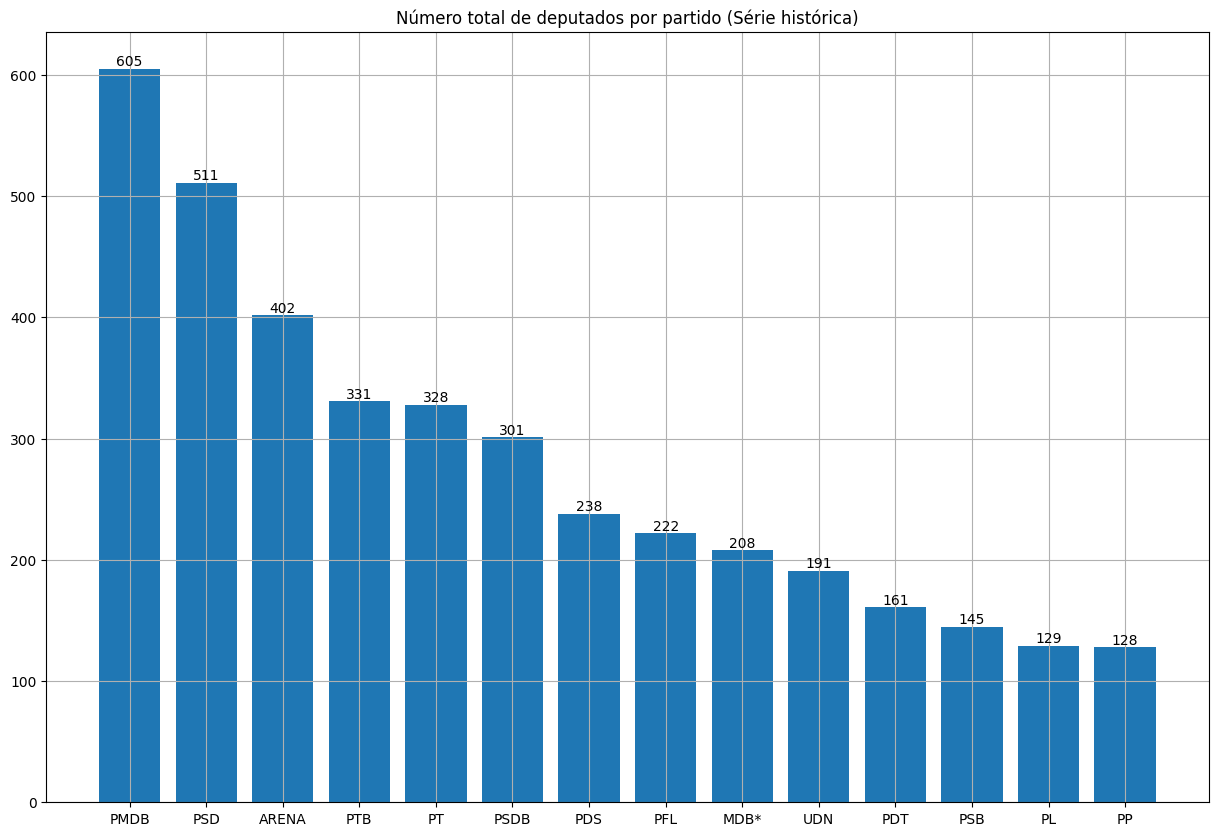

In [ ]:
partidos = {}
for deputado in deputados_list:
    partido_deputado = deputado.dados.ultimoStatus.siglaPartido
    if partido_deputado == None:
        partido_deputado = 'Sem partido'
    if partido_deputado not in partidos:
        partidos[partido_deputado] = 1
    else:
        partidos[partido_deputado] += 1
    

partidos_ordenados = dict(sorted(partidos.items(), key=lambda item: item[1], reverse=True))


x_axis = list(partidos_ordenados.keys())[:15]
y_axis = list(partidos_ordenados.values())[:15]

x_axis = x_axis[1:len(x_axis)]
y_axis = y_axis[1:len(y_axis)]



plt.figure(figsize=(15, 10))
barras = plt.bar(x_axis, y_axis)

for barra in barras:
    altura = barra.get_height()
    plt.text(
        barra.get_x() + barra.get_width() / 2, 
        altura,                               
        f'{altura}',                           
        ha='center',                         
        va='bottom'                            
    )

plt.title('Número total de deputados por partido (Série histórica)')

